In [83]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [84]:
from utils import create_plotly_conf_mat
from nexa_py_sentimotion_mapper.sentimotion_mapper import Mapper

Mapper._load_data_if_needed()

In [85]:
path = "../data/collaboration_study/export_collaboration_study.csv"
df = pd.read_csv(path)
df.head()

,user_id,survey_id,survey_item_index,filename,has_reply,time_spent_on_item,video_duration,last_modified,emotion_1,video_id,mix,emotion_1_id,emotion_2_id,intensity_level,reply
0,collab036,0503e40417ef124d31647ca574934c70ab38103a3c5f64...,0,A405_amu_v_3.mp4,1,11987,2500,2024-07-25T14:14:45.879771+02:00,amusement,A405,0,13,100,3,9
1,collab036,0503e40417ef124d31647ca574934c70ab38103a3c5f64...,1,A327_tri_v_2.mp4,1,16585,6940,2024-07-25T14:15:05.079612+02:00,triumph_achievement,A327,0,20,100,2,35
2,collab036,0503e40417ef124d31647ca574934c70ab38103a3c5f64...,2,A334_conf_p_2.mp4,1,47907,2860,2024-07-25T14:15:53.764018+02:00,confusion,A334,0,1,100,2,1
3,collab036,0503e40417ef124d31647ca574934c70ab38103a3c5f64...,3,A64_exc_p_2.mp4,1,15433,3740,2024-07-25T14:16:09.945222+02:00,excitement_expectation,A64,0,36,100,2,35
4,collab036,0503e40417ef124d31647ca574934c70ab38103a3c5f64...,4,A437_int_v_3.mp4,1,12805,2340,2024-07-25T14:16:23.547808+02:00,interest_curiosity,A437,0,29,100,3,29


## General Results

Results for the collaboration study where items have been evaluated by n=22 participants. Items have only been evaluated on their acoustic content. Audio was normalized for all items using peak normalization. 

In [86]:
y_true = df[["emotion_1_id"]]
y_pred = df[["reply"]]

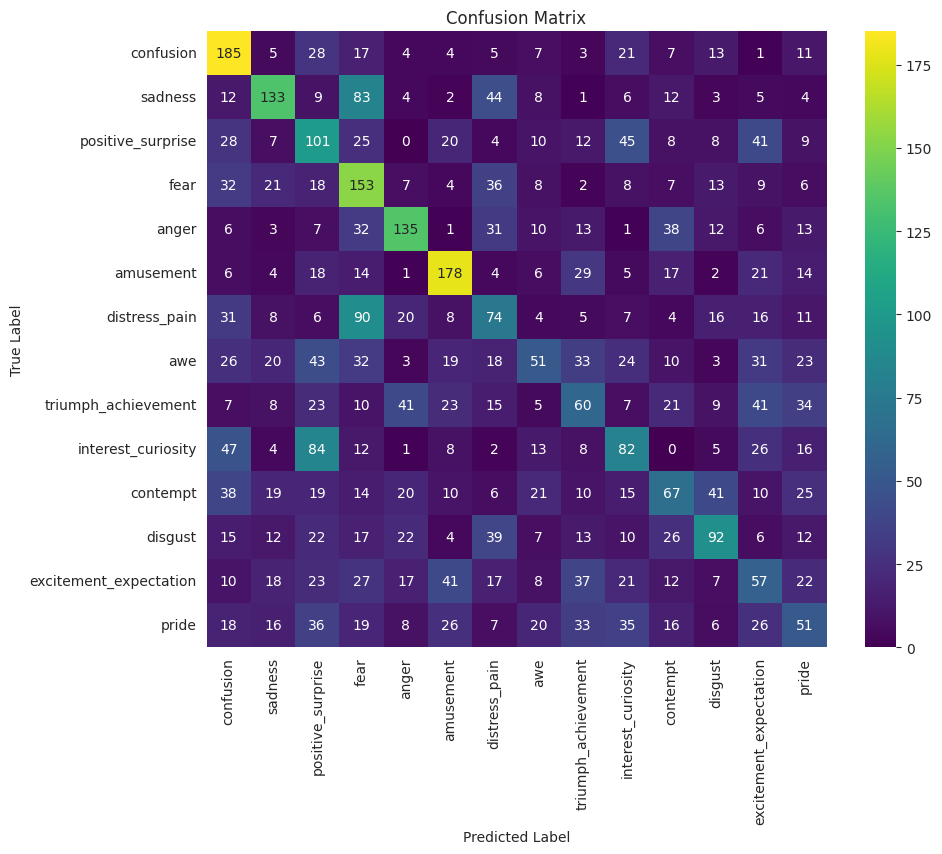

In [87]:
emotion_ids = np.unique(y_true)

conf_matrix = confusion_matrix(y_true, y_pred)

emotions = Mapper.get_emotion_from_id(emotion_ids)

plt.figure(figsize=(10, 8))  # You can adjust the figure size as needed
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=emotions, yticklabels=emotions)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [88]:
emotion_ids = Mapper.get_emotion_from_id(np.unique(y_true))
report = classification_report(y_true, y_pred, target_names=emotion_ids)
print(report)

                        precision    recall  f1-score   support

             confusion       0.40      0.59      0.48       311
               sadness       0.48      0.41      0.44       326
     positive_surprise       0.23      0.32      0.27       318
                  fear       0.28      0.47      0.35       324
                 anger       0.48      0.44      0.46       308
             amusement       0.51      0.56      0.53       319
         distress_pain       0.25      0.25      0.25       300
                   awe       0.29      0.15      0.20       336
   triumph_achievement       0.23      0.20      0.21       304
    interest_curiosity       0.29      0.27      0.28       308
              contempt       0.27      0.21      0.24       315
               disgust       0.40      0.31      0.35       297
excitement_expectation       0.19      0.18      0.19       317
                 pride       0.20      0.16      0.18       317

              accuracy                

In [89]:
df['accurate'] = df['emotion_1_id'] == df['reply']
df.head()

,user_id,survey_id,survey_item_index,filename,has_reply,time_spent_on_item,video_duration,last_modified,emotion_1,video_id,mix,emotion_1_id,emotion_2_id,intensity_level,reply,accurate
0,collab036,0503e40417ef124d31647ca574934c70ab38103a3c5f64...,0,A405_amu_v_3.mp4,1,11987,2500,2024-07-25T14:14:45.879771+02:00,amusement,A405,0,13,100,3,9,False
1,collab036,0503e40417ef124d31647ca574934c70ab38103a3c5f64...,1,A327_tri_v_2.mp4,1,16585,6940,2024-07-25T14:15:05.079612+02:00,triumph_achievement,A327,0,20,100,2,35,False
2,collab036,0503e40417ef124d31647ca574934c70ab38103a3c5f64...,2,A334_conf_p_2.mp4,1,47907,2860,2024-07-25T14:15:53.764018+02:00,confusion,A334,0,1,100,2,1,True
3,collab036,0503e40417ef124d31647ca574934c70ab38103a3c5f64...,3,A64_exc_p_2.mp4,1,15433,3740,2024-07-25T14:16:09.945222+02:00,excitement_expectation,A64,0,36,100,2,35,False
4,collab036,0503e40417ef124d31647ca574934c70ab38103a3c5f64...,4,A437_int_v_3.mp4,1,12805,2340,2024-07-25T14:16:23.547808+02:00,interest_curiosity,A437,0,29,100,3,29,True


## Accuracy by subject

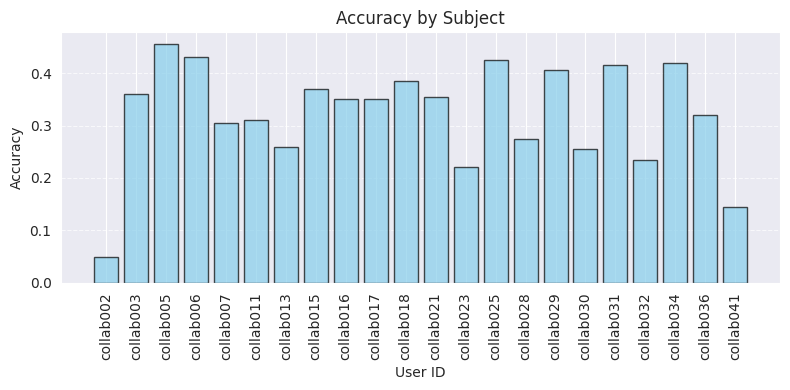

In [90]:
# Group the DataFrame by 'emotion_id' and calculate the accuracy for each ID
accuracy_by_subject = df.groupby('user_id')['accurate'].mean().reset_index()

plt.figure(figsize=(8, 4))
plt.bar(accuracy_by_subject['user_id'], accuracy_by_subject['accurate'], color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel("User ID")
plt.ylabel("Accuracy")
plt.title("Accuracy by Subject")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal grid lines only
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

In [91]:
accuracy_by_subject

,user_id,accurate
0,collab002,0.050
1,collab003,0.360
2,collab005,0.455
3,collab006,0.430
4,collab007,0.305
5,collab011,0.310
6,collab013,0.260
7,collab015,0.370
8,collab016,0.350
9,collab017,0.350


## Accuracy By Emotion

In [92]:
# Map emotion IDs to actual emotions using your Mapper class and create a new 'emotion' column
df['emotion'] = df['emotion_1_id'].map(Mapper.get_emotion_from_id)
df.head()

,user_id,survey_id,survey_item_index,filename,has_reply,time_spent_on_item,video_duration,last_modified,emotion_1,video_id,mix,emotion_1_id,emotion_2_id,intensity_level,reply,accurate,emotion
0,collab036,0503e40417ef124d31647ca574934c70ab38103a3c5f64...,0,A405_amu_v_3.mp4,1,11987,2500,2024-07-25T14:14:45.879771+02:00,amusement,A405,0,13,100,3,9,False,amusement
1,collab036,0503e40417ef124d31647ca574934c70ab38103a3c5f64...,1,A327_tri_v_2.mp4,1,16585,6940,2024-07-25T14:15:05.079612+02:00,triumph_achievement,A327,0,20,100,2,35,False,triumph_achievement
2,collab036,0503e40417ef124d31647ca574934c70ab38103a3c5f64...,2,A334_conf_p_2.mp4,1,47907,2860,2024-07-25T14:15:53.764018+02:00,confusion,A334,0,1,100,2,1,True,confusion
3,collab036,0503e40417ef124d31647ca574934c70ab38103a3c5f64...,3,A64_exc_p_2.mp4,1,15433,3740,2024-07-25T14:16:09.945222+02:00,excitement_expectation,A64,0,36,100,2,35,False,excitement_expectation
4,collab036,0503e40417ef124d31647ca574934c70ab38103a3c5f64...,4,A437_int_v_3.mp4,1,12805,2340,2024-07-25T14:16:23.547808+02:00,interest_curiosity,A437,0,29,100,3,29,True,interest_curiosity


In [93]:
# Group the DataFrame by 'emotion_id' and calculate the accuracy for each ID
accuracy_by_emotion = df.groupby('emotion')['accurate'].mean().reset_index()

# Rename the columns for clarity
accuracy_by_emotion.columns = ['emotion', 'accuracy']

# Print or plot the accuracy results
print(accuracy_by_emotion.sort_values(by='accuracy', ascending=False))

                   emotion  accuracy
3                confusion  0.594855
0                amusement  0.557994
8                     fear  0.472222
1                    anger  0.438312
12                 sadness  0.407975
10       positive_surprise  0.317610
5                  disgust  0.309764
9       interest_curiosity  0.266234
6            distress_pain  0.246667
4                 contempt  0.212698
13     triumph_achievement  0.197368
7   excitement_expectation  0.179811
11                   pride  0.160883
2                      awe  0.151786


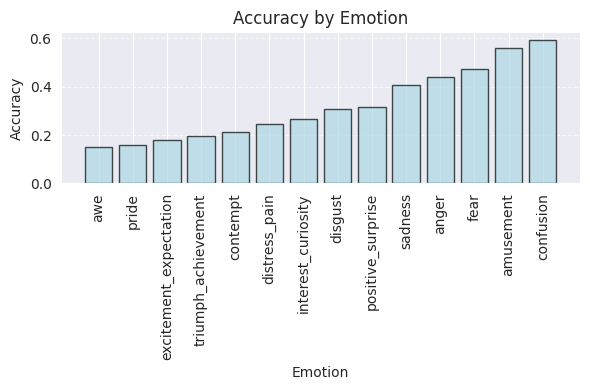

In [94]:
# Sort the DataFrame by 'accuracy' to have a meaningful order in the plot
accuracy_by_emotion_sorted = accuracy_by_emotion.sort_values(by='accuracy', ascending=True)

plt.figure(figsize=(6, 4))

# Create a vertical bar plot
plt.bar(accuracy_by_emotion_sorted['emotion'], accuracy_by_emotion_sorted['accuracy'], color='lightblue', edgecolor='k', alpha=0.7)

plt.xlabel("Emotion")
plt.ylabel("Accuracy")
plt.title("Accuracy by Emotion")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal grid lines only

plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

## Accuracy by item

In [95]:
# Assuming 'df' is your DataFrame
accuracy_by_filename = df.groupby('filename')['accurate'].mean().reset_index()
accuracy_by_filename

,filename,accurate
0,A102_ang_v_2.mp4,0.666667
1,A102_ang_v_3.mp4,0.250000
2,A102_conf_v_2.mp4,1.000000
3,A102_conf_v_3.mp4,0.166667
4,A102_cont_v_2.mp4,0.666667
...,...,...
665,A91_int_v_3.mp4,0.000000
666,A91_pri_p_2.mp4,0.714286
667,A91_pri_v_2.mp4,0.000000
668,A91_pri_v_3.mp4,0.000000


In [96]:
accuracy_by_filename["accurate"].value_counts().sort_index()

accurate
0.000000    160
0.111111     11
0.125000     24
0.142857     45
0.166667     42
0.200000     19
0.222222      5
0.250000     26
0.285714     28
0.300000      5
0.333333     34
0.363636      1
0.375000     15
0.400000     31
0.428571     21
0.444444      5
0.500000     42
0.555556      6
0.571429     15
0.600000     16
0.625000     10
0.666667     21
0.700000      2
0.714286     10
0.750000     14
0.777778      3
0.800000     16
0.833333     13
0.857143      9
0.875000      3
1.000000     18
Name: count, dtype: int64

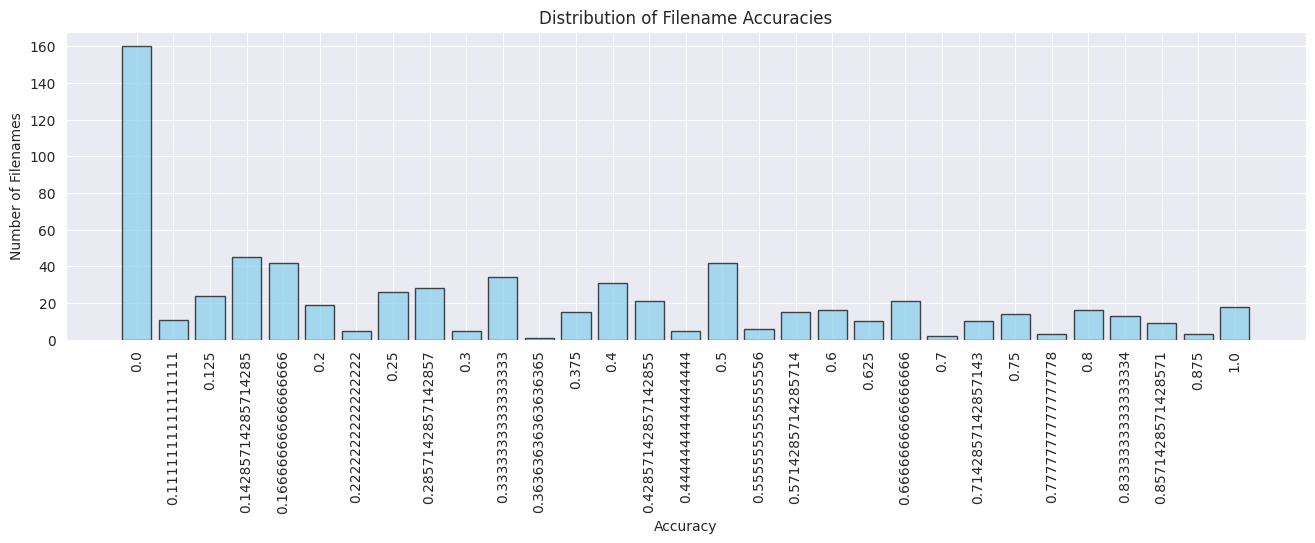

In [97]:
# Ensure the indices are numeric and sorted
accuracy_counts = accuracy_by_filename['accurate'].value_counts().sort_index()
accuracy_counts.index = accuracy_counts.index.astype(float)  # Convert indices to float if they represent numbers
accuracy_counts = accuracy_counts.sort_index()  # Sort by the numeric indices

plt.figure(figsize=(16, 4))
plt.bar(accuracy_counts.index.astype(str), accuracy_counts.values, color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('Accuracy')
plt.ylabel('Number of Filenames')
plt.title('Distribution of Filename Accuracies')
plt.xticks(rotation=90)  # Ensure all accuracy categories are shown as x-ticks
plt.show()

In [98]:
from nexa_preprocessing.utils.time_series_operations import slice_by
from coding_interpreter.metadata import Metadata
from pathlib import Path

slices = slice_by(df, "filename")

# Create an empty dictionary to store information for each filename
filename_info = {}

for df_ in slices:
    # identify unique aliases
    unique_aliases = df_["user_id"].unique()
    # save how many aliases, e.g. responses, for current filename
    coverage = len(unique_aliases)
    
    # Calculate accuracy (mean of the "accurate" column)
    accuracy = df_["accurate"].mean()
    n_correct_answers = sum(df_["accurate"])
    
    unique_filenames = df_["filename"].unique()
    
    
    assert len(unique_filenames) == 1
    filename = Path(unique_filenames[0]).stem
        
    meta = Metadata(filename)
    
    # Store information in the dictionary
    filename_info[filename] = {
        "emotion": Mapper.get_emotion_from_emotion_abr(meta.emotion_1),
        "emotion_id": meta.emotion_1_id,
        "intensity_level": meta.intensity_level,
        "mode": meta.mode,
        "coverage": coverage,
        "n_correct_answers": n_correct_answers,
        "accuracy": accuracy
    }

# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame.from_dict(filename_info, orient="index")

# Reset the index to have "filename" as a column
accuracy_df.reset_index(inplace=True)
accuracy_df.rename(columns={"index": "filename"}, inplace=True)

In [99]:
# accuracy_by_filename.rename(columns={'accurate': 'accuracy'}, inplace=True)

In [100]:
accuracy_df.to_csv('../data/collaboration_study/accuracy_by_filename.csv', index=False)